# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

## Examples

One more time, I'll load the data from the NSFG.

In [2]:
live, firsts, others = first.MakeFrames()

And compute the distribution of birth weight for first babies and others.

In [3]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


We can plot the PMFs on the same scale, but it is hard to see if there is a difference.

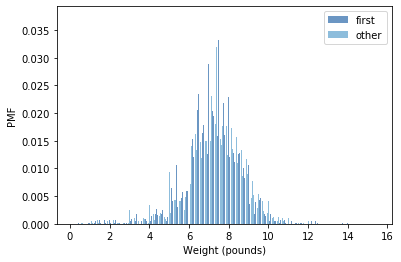

In [4]:
width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

`PercentileRank` computes the fraction of `scores` less than or equal to `your_score`.

In [5]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

If this is the list of scores.

In [6]:
t = [55, 66, 77, 88, 99]

And you got the 88, your percentile rank is 80.

In [7]:
PercentileRank(t, 88)

80.0

`Percentile` takes a percentile rank and computes the corresponding percentile. 

In [8]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

The median is the 50th percentile, which is 77.

In [9]:
Percentile(t, 50)

77

Here's a more efficient way to compute percentiles.

In [10]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

Let's hope we get the same answer.

In [11]:
Percentile2(t, 50)

77

The Cumulative Distribution Function (CDF) is almost the same as `PercentileRank`.  The only difference is that the result is 0-1 instead of 0-100.

In [12]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In this list

In [13]:
t = [1, 2, 2, 3, 5]

We can evaluate the CDF for various values:

In [14]:
EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)

(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

Here's an example using real data, the distribution of pregnancy length for live births.

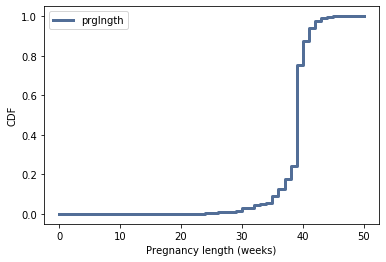

In [15]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

`Cdf` provides `Prob`, which evaluates the CDF; that is, it computes the fraction of values less than or equal to the given value.  For example, 94% of pregnancy lengths are less than or equal to 41.

In [16]:
cdf.Prob(41)

0.9406427634455619

`Value` evaluates the inverse CDF; given a fraction, it computes the corresponding value.  For example, the median is the value that corresponds to 0.5.

In [17]:
cdf.Value(0.5)

39

In general, CDFs are a good way to visualize distributions.  They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.

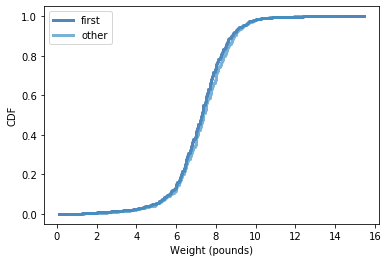

In [18]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In this example, we can see that first babies are slightly, but consistently, lighter than others.

We can use the CDF of birth weight to compute percentile-based statistics.

In [19]:
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

Again, the median is the 50th percentile.

In [20]:
median = live_cdf.Percentile(50)
median

7.375

The interquartile range is the interval from the 25th to 75th percentile.

In [21]:
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

We can use the CDF to look up the percentile rank of a particular value.  For example, my second daughter was 10.2 pounds at birth, which is near the 99th percentile.

In [22]:
live_cdf.PercentileRank(10.2)

98.82717415357381

If we draw a random sample from the observed weights and map each weigh to its percentile rank.

In [23]:
sample = np.random.choice(weights, 100, replace=True)
ranks = [live_cdf.PercentileRank(x) for x in sample]

The resulting list of ranks should be approximately uniform from 0-1.

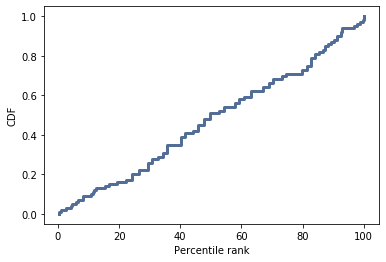

In [24]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

That observation is the basis of `Cdf.Sample`, which generates a random sample from a Cdf.  Here's an example.

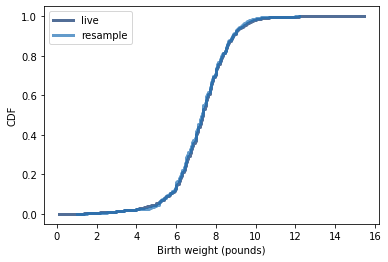

In [26]:
resample = live_cdf.Sample(1000)
thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='CDF')

This confirms that the random sample has the same distribution as the original data.

## Exercises

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [66]:
# trying to replicate some of this with regular pandas/matplotlib first
# EvalCdf and PercentileRank fine to use, those are simple enough definitions
# just trying to avoid custom classes

calc_cdf = lambda x: EvalCdf(live.totalwgt_lb, x)

live = live.sort_values('totalwgt_lb')

live['cdf'] = live.totalwgt_lb.apply(calc_cdf)

live.cdf

9193     0.000109
12788    0.000219
1041     0.000328
4963     0.000437
7800     0.000656
5411     0.000656
6456     0.000765
9182     0.000875
8870     0.001202
4104     0.001202
7075     0.001202
9850     0.001421
6438     0.001421
3361     0.001530
3841     0.001749
6437     0.001749
5307     0.002077
11947    0.002077
3165     0.002077
541      0.002733
6441     0.002733
6172     0.002733
9743     0.002733
157      0.002733
4007     0.002733
7762     0.002842
2440     0.003279
4798     0.003279
9010     0.003279
13173    0.003279
           ...   
9333     0.000000
9396     0.000000
9457     0.000000
9585     0.000000
9586     0.000000
9858     0.000000
9883     0.000000
9896     0.000000
9955     0.000000
10399    0.000000
10400    0.000000
10418    0.000000
10682    0.000000
10684    0.000000
11147    0.000000
11148    0.000000
11276    0.000000
11713    0.000000
11887    0.000000
12118    0.000000
12356    0.000000
12375    0.000000
12578    0.000000
12640    0.000000
13229    0

(0, 1)

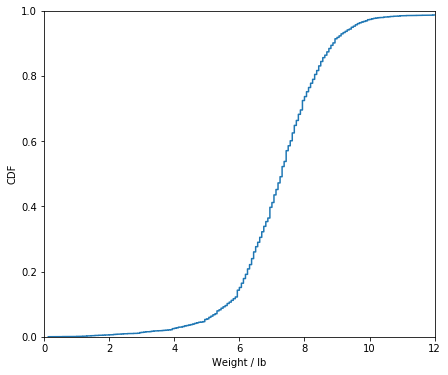

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 6))
plt.step(live.totalwgt_lb, live.cdf)
plt.xlabel('Weight / lb')
plt.ylabel('CDF')
plt.xlim(0, 12)
plt.ylim(0, 1)

In [67]:
# Solution goes here
my_weight = 9.2

PercentileRank(live.totalwgt_lb, 9.2)

92.88369042413642

In [71]:
others = others.sort_values('totalwgt_lb')

PercentileRank(others.totalwgt_lb, 9.2)

92.39704329461458

**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [151]:
# Solution goes here
import pandas as pd

numbers = pd.Series(np.random.random(1000))

In [152]:
counts = numbers.value_counts()
pmf = counts.divide(counts.sum())

pmf

0.381342    0.001
0.018057    0.001
0.700360    0.001
0.489638    0.001
0.343380    0.001
0.974814    0.001
0.460749    0.001
0.287864    0.001
0.691532    0.001
0.382706    0.001
0.150335    0.001
0.490778    0.001
0.553315    0.001
0.127077    0.001
0.100289    0.001
0.734307    0.001
0.881342    0.001
0.769973    0.001
0.803058    0.001
0.484077    0.001
0.465797    0.001
0.129339    0.001
0.465701    0.001
0.432740    0.001
0.873562    0.001
0.300959    0.001
0.871325    0.001
0.983136    0.001
0.612994    0.001
0.695327    0.001
            ...  
0.167696    0.001
0.326093    0.001
0.237290    0.001
0.613932    0.001
0.159838    0.001
0.733236    0.001
0.314547    0.001
0.805022    0.001
0.669953    0.001
0.086022    0.001
0.659514    0.001
0.022123    0.001
0.254796    0.001
0.705789    0.001
0.303694    0.001
0.865850    0.001
0.780606    0.001
0.172748    0.001
0.582083    0.001
0.950793    0.001
0.205633    0.001
0.978573    0.001
0.087414    0.001
0.207753    0.001
0.928707  

<BarContainer object of 1000 artists>

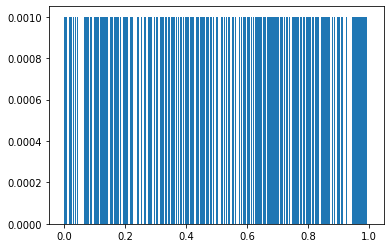

In [153]:
# Solution goes here

plt.figure()
plt.bar(pmf.index, pmf.values, width = 0.001)

In [158]:
cdfer = lambda x: EvalCdf(numbers, x)

numbers = numbers.sort_values()

cdf = numbers.apply(cdfer)

cdf

165    0.001
364    0.002
649    0.003
234    0.004
290    0.005
730    0.006
553    0.007
276    0.008
64     0.009
639    0.010
783    0.011
417    0.012
13     0.013
407    0.014
265    0.015
682    0.016
2      0.017
82     0.018
379    0.019
179    0.020
866    0.021
427    0.022
492    0.023
630    0.024
552    0.025
933    0.026
818    0.027
243    0.028
212    0.029
66     0.030
       ...  
59     0.971
541    0.972
691    0.973
313    0.974
905    0.975
227    0.976
994    0.977
289    0.978
604    0.979
169    0.980
849    0.981
912    0.982
924    0.983
732    0.984
605    0.985
770    0.986
575    0.987
602    0.988
716    0.989
398    0.990
327    0.991
983    0.992
976    0.993
587    0.994
432    0.995
978    0.996
420    0.997
467    0.998
393    0.999
845    1.000
Length: 1000, dtype: float64

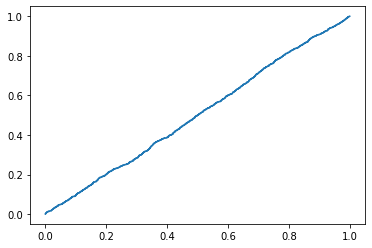

In [159]:
plt.figure()
plt.step(numbers, cdf)